In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load data and store in dataframe df:

In [3]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h4>Linear Regression</h4>

$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$


 <b>Linear function:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

In [4]:
from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object</h4>

In [5]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [6]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg.

In [7]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 We can output a prediction 

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h4>Intercept</h4>

In [9]:
lm.intercept_

38423.3058581574

<h4>Slope</h4>

In [10]:
# for every 1 mpg increase the price decreases by 821
lm.coef_ 

array([-821.73337832])

As we saw above, we should get a final linear model with the structure:

$$
Yhat = a + b  X
$$

Plugging in the actual values we get:

<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>

In [11]:
lm2 = LinearRegression()

In [12]:
X = df['engine-size']
Y = df['price']
lm2.fit(df[['engine-size']], df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h4>Slope</h4>

In [13]:
lm2.coef_

array([[166.86001569]])

<h4>Intercept</h4>

In [14]:
 lm2.intercept_

array([-7963.33890628])

<h4>Multiple Linear Regression</h4>

The equation is given by

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [15]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.

In [16]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lm.intercept_

-15806.62462632923

values of the coefficients (b1, b2, b3, b4)

In [18]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>

In [19]:
lm3 = LinearRegression()
X1 = df[['normalized-losses','highway-mpg']]
lm3.fit(X1,df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lm3.coef_

array([[   1.49789586, -820.45434016]])

<h3> Model Evaluation using Visualization</h3>

In [21]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>

 Let's visualize Horsepower as potential predictor variable of price:

(0.0, 48171.747708274)

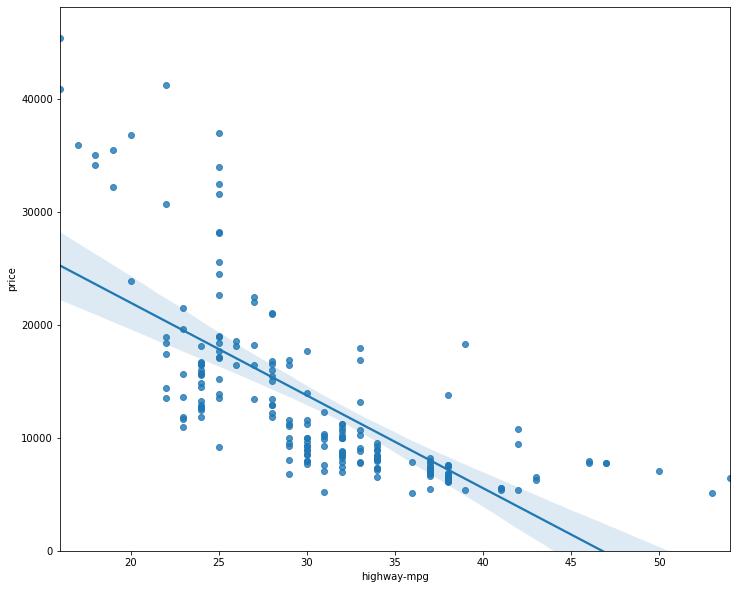

In [22]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.</p>

(0.0, 47414.1)

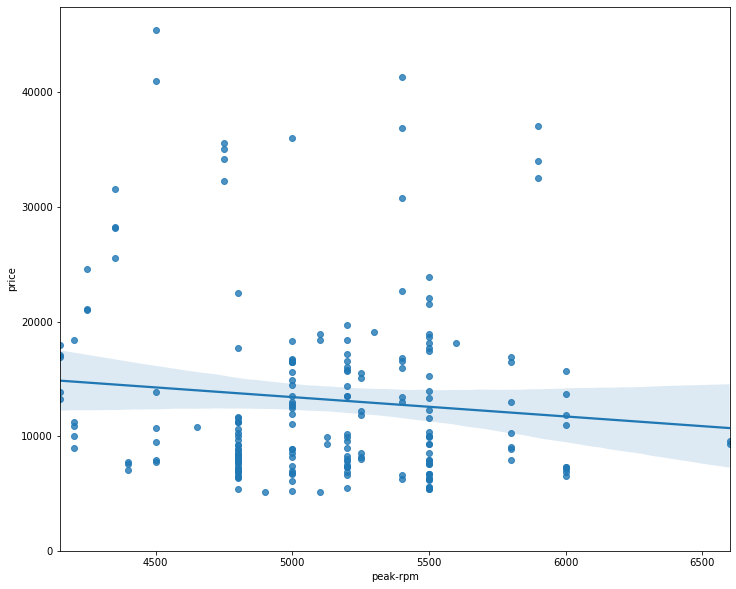

In [23]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.</p>

In [24]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<h3>Residual Plot</h3>


<p>We look at the spread of the residuals:</p>


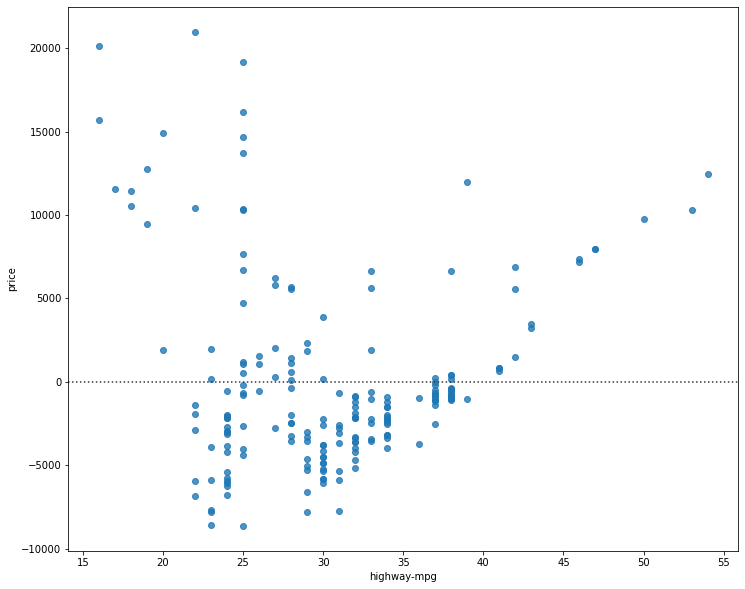

In [25]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()


<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.</p>

<h3>Multiple Linear Regression</h3>

First lets make a prediction 

In [26]:
Y_hat = lm.predict(Z)

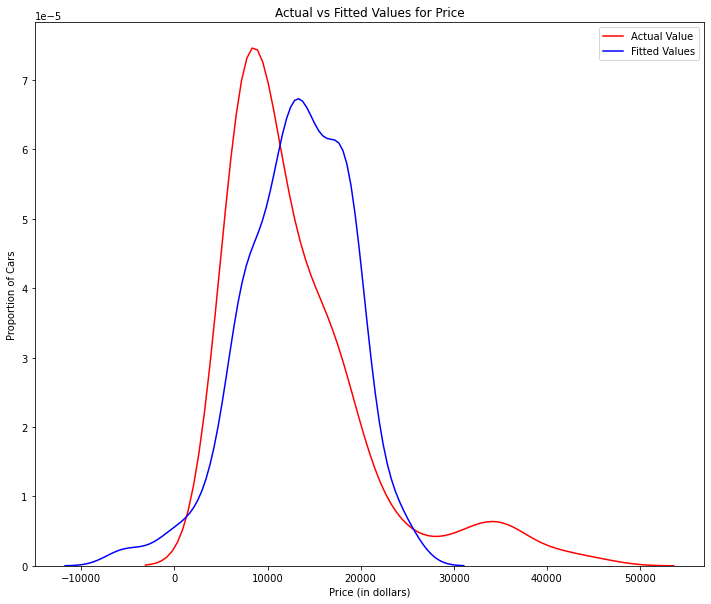

In [27]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

<h2>Part 3: Polynomial Regression and Pipelines</h2>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

<p>We will use the following function to plot the data:</p>

In [28]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

lets get the variables

In [29]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [30]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


 Let's plot the function 

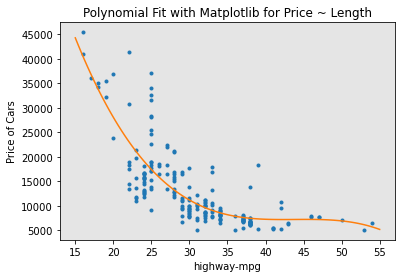

In [31]:
PlotPolly(p, x, y, 'highway-mpg')

In [32]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


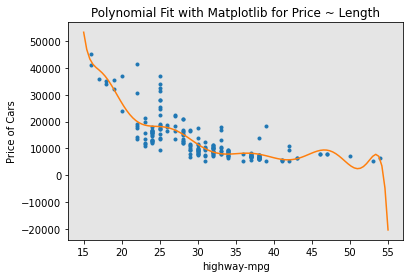

In [65]:
#11 order polynomial model with the variables x and y
p11 = np.polyfit(x,y,11)
p1d = np.poly1d(p11)
print(p1d)
PlotPolly(p1d,x,y,'highway-mpg')

We can perform a polynomial transform on multiple features. First, we import the module:

In [34]:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of degree 2: 

In [35]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [36]:
Z_pr=pr.fit_transform(Z)

The original data is of 201 samples and 4 features 

In [37]:
Z.shape

(201, 4)

after the transformation, there 201 samples and 15 features

In [38]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>

<p>We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [40]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

we input the list as an argument to the pipeline constructor 

In [41]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

We can normalize the data,  perform a transform and fit the model simultaneously. 

In [42]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [43]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<h2>In-Sample Evaluation</h2>

<h3>Model 1: Simple Linear Regression</h3>

Let's calculate the R^2

In [45]:
X = df[['engine-size']]

In [46]:
X.shape

(201, 1)

In [47]:
#highway_mpg_fit
lm5 = LinearRegression()
lm5.fit(X,Y)
# Find the R^2
print('The R-square is: ', lm5.score(X, Y))

The R-square is:  0.7609686443622008


Let's calculate the MSE

In [48]:
Yhat=lm5.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


In [50]:
res = pd.DataFrame([Y,Yhat]).transpose()

In [66]:
res.columns = ['test_price','pred_price']
res

,test_price,pred_price
0,13495.0,13728.463134
1,16500.0,13728.463134
2,16500.0,17399.383479
3,13950.0,10224.402804
4,17450.0,14729.623228
...,...,...
196,16845.0,15563.923306
197,19045.0,15563.923306
198,21485.0,20903.443808
199,22470.0,16231.363369


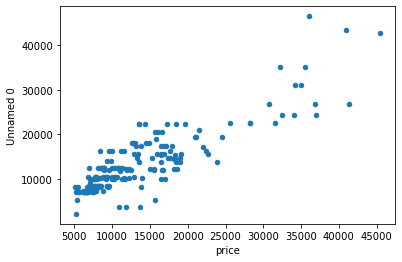

In [51]:
res.plot(kind='scatter',x='price',y='Unnamed 0')

lets import the function <b>mean_squared_error</b> from the module <b>metrics</b>

In [52]:
from sklearn.metrics import mean_squared_error

we compare the predicted results with the actual results 

In [53]:
mse = mean_squared_error(Y, Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


<h3>Model 2: Multiple Linear Regression</h3>

Let's calculate the R^2

In [54]:
# fit the model 
lm5.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm5.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [55]:
Y_predict_multifit = lm5.predict(Z)

 we compare the predicted results with the actual results 

In [56]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>

Let's calculate the R^2

In [57]:
from sklearn.metrics import r2_score

We apply the function to get the value of r^2

In [58]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


<h3>MSE</h3>

In [59]:
mean_squared_error(df['price'], p(x))

20474146.426361218

<h3>Prediction</h3>


In [60]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input 

In [61]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

 Fit the model 

In [62]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Produce a prediction

In [63]:
yhat=lm.predict(new_input)
yhat[0:5]

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

we can plot the data 

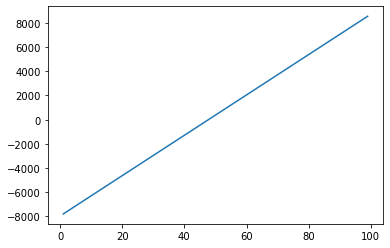

In [64]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared:  0.7609686443622008</li>
    <li>MSE: 1.5 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

<h2>Conclusion:</h2>

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset.</p>